<h1>Data Exploration</h1>

In [ ]:
# if using google colab, run these pip installs
# !pip install langchain-community
# !pip install neo4j
# !pip install pyvis
# !pip install faiss-cpu
# !pip install langchain_groq

In [1]:
import networkx as nx
print(nx.__version__)


3.3


In [2]:
import matplotlib.pyplot as plt
import certifi
import ssl

context = ssl.create_default_context(cafile=certifi.where())
print("SSL context created from certifi CA bundle")


SSL context created from certifi CA bundle


In [3]:
from langchain_community.graphs import Neo4jGraph
import certifi
import ssl

# Create custom SSL context
ssl_context = ssl.create_default_context(cafile=certifi.where())

kg = Neo4jGraph(
    url="bolt://demo.neo4jlabs.com:7687",  
    username="recommendations",
    password="recommendations",
    database="recommendations",
    driver_config={
        "encrypted": True,                
        "ssl_context": ssl_context        
    }
)

print(kg.query("CALL db.labels()"))


C:\Users\caste\AppData\Local\Temp\ipykernel_20544\4142087179.py:8: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :class:`~langchain-neo4j` and import as `from :class:`~langchain_neo4j import Neo4jGraph``.
  kg = Neo4jGraph(


[{'label': 'Movie'}, {'label': 'Genre'}, {'label': 'User'}, {'label': 'Actor'}, {'label': 'Director'}, {'label': 'Person'}, {'label': '_Bloom_Perspective_'}, {'label': '_Bloom_Scene_'}]


In [82]:
kg.query("MATCH (n) RETURN COUNT(n) AS total_nodes")

[{'total_nodes': 28865}]

In [5]:
kg.query("MATCH ()-[r]->() RETURN COUNT(r) AS total_relationships")


[{'total_relationships': 166262}]

In [224]:
kg.query("CALL db.labels()")


[{'label': 'Movie'},
 {'label': 'Genre'},
 {'label': 'User'},
 {'label': 'Actor'},
 {'label': 'Director'},
 {'label': 'Person'},
 {'label': '_Bloom_Perspective_'},
 {'label': '_Bloom_Scene_'}]

In [225]:
kg.query("CALL db.relationshipTypes()")


[{'relationshipType': 'IN_GENRE'},
 {'relationshipType': 'RATED'},
 {'relationshipType': 'ACTED_IN'},
 {'relationshipType': 'DIRECTED'},
 {'relationshipType': '_Bloom_HAS_SCENE_'}]

In [226]:
kg.query("CALL db.propertyKeys()")


[{'propertyKey': 'movieId'},
 {'propertyKey': 'name'},
 {'propertyKey': 'userId'},
 {'propertyKey': 'imdbId'},
 {'propertyKey': 'title'},
 {'propertyKey': 'rating'},
 {'propertyKey': 'timestamp'},
 {'propertyKey': 'tmdbId'},
 {'propertyKey': 'year'},
 {'propertyKey': 'countries'},
 {'propertyKey': 'languages'},
 {'propertyKey': 'plot'},
 {'propertyKey': 'imdbRating'},
 {'propertyKey': 'imdbVotes'},
 {'propertyKey': 'released'},
 {'propertyKey': 'runtime'},
 {'propertyKey': 'poster'},
 {'propertyKey': 'revenue'},
 {'propertyKey': 'budget'},
 {'propertyKey': 'tagline'},
 {'propertyKey': 'role'},
 {'propertyKey': 'born'},
 {'propertyKey': 'died'},
 {'propertyKey': 'bornIn'},
 {'propertyKey': 'bio'},
 {'propertyKey': 'url'},
 {'propertyKey': 'plotEmbedding'},
 {'propertyKey': 'posterEmbedding'},
 {'propertyKey': 'id'},
 {'propertyKey': 'data'},
 {'propertyKey': 'nodes'},
 {'propertyKey': 'relationships'},
 {'propertyKey': 'style'},
 {'propertyKey': 'visualisation'},
 {'propertyKey': 'versi

In [227]:
kg.query("""
MATCH (a:Actor)-[r:ACTED_IN]->(m:Movie)
RETURN a.name AS actor, m.title AS movie
LIMIT 10
""")


[{'actor': 'Jim Varney', 'movie': 'Toy Story'},
 {'actor': 'Tim Allen', 'movie': 'Toy Story'},
 {'actor': 'Tom Hanks', 'movie': 'Toy Story'},
 {'actor': 'Don Rickles', 'movie': 'Toy Story'},
 {'actor': 'Robin Williams', 'movie': 'Jumanji'},
 {'actor': 'Bradley Pierce', 'movie': 'Jumanji'},
 {'actor': 'Kirsten Dunst', 'movie': 'Jumanji'},
 {'actor': 'Jonathan Hyde', 'movie': 'Jumanji'},
 {'actor': 'Walter Matthau', 'movie': 'Grumpier Old Men'},
 {'actor': 'Ann-Margret', 'movie': 'Grumpier Old Men'}]

In [228]:
kg.query("""
MATCH (m:Movie)-[r:IN_GENRE]->(g:Genre)
RETURN m.title AS movie, g.name AS genre
LIMIT 10
""")


[{'movie': 'Boxtrolls, The', 'genre': 'Adventure'},
 {'movie': 'The Book of Life', 'genre': 'Adventure'},
 {'movie': 'Teenage Mutant Ninja Turtles', 'genre': 'Adventure'},
 {'movie': 'Jupiter Ascending', 'genre': 'Adventure'},
 {'movie': 'Planes: Fire & Rescue', 'genre': 'Adventure'},
 {'movie': 'Transformers: Age of Extinction', 'genre': 'Adventure'},
 {'movie': 'Hercules', 'genre': 'Adventure'},
 {'movie': 'The Expendables 3', 'genre': 'Adventure'},
 {'movie': 'Guardians of the Galaxy', 'genre': 'Adventure'},
 {'movie': 'Maleficent', 'genre': 'Adventure'}]

In [229]:
kg.query("""
MATCH (u:User)-[r:RATED]->(m:Movie)
RETURN u.userId AS user, m.title AS movie, r.rating AS rating
LIMIT 10
""")


[{'user': '1', 'movie': 'Antz', 'rating': 2.0},
 {'user': '1', 'movie': 'Fly, The', 'rating': 2.5},
 {'user': '1', 'movie': 'Time Bandits', 'rating': 1.0},
 {'user': '1', 'movie': 'Blazing Saddles', 'rating': 3.0},
 {'user': '1', 'movie': 'French Connection, The', 'rating': 4.0},
 {'user': '1', 'movie': 'Tron', 'rating': 4.0},
 {'user': '1', 'movie': 'Gods Must Be Crazy, The', 'rating': 3.0},
 {'user': '1', 'movie': 'Willow', 'rating': 2.0},
 {'user': '1', 'movie': 'Sleepers', 'rating': 3.0},
 {'user': '1', 'movie': 'Escape from New York', 'rating': 2.0}]

In [230]:
kg.query("""
MATCH (d:Director)-[r:DIRECTED]->(m:Movie)
RETURN d.name AS director, m.title AS movie
LIMIT 10
""")


[{'director': 'Harold Lloyd', 'movie': 'Kid Brother, The'},
 {'director': 'Paul Wegener',
  'movie': 'Golem, The (Golem, wie er in die Welt kam, Der)'},
 {'director': 'Buster Keaton', 'movie': 'Cameraman, The'},
 {'director': 'Buster Keaton', 'movie': 'Boat, The'},
 {'director': 'Buster Keaton', 'movie': 'Play House, The'},
 {'director': 'Buster Keaton', 'movie': 'Haunted House, The'},
 {'director': 'Buster Keaton', 'movie': 'College'},
 {'director': 'Buster Keaton', 'movie': 'Steamboat Bill, Jr.'},
 {'director': 'Buster Keaton', 'movie': 'Cops'},
 {'director': 'Buster Keaton', 'movie': 'Navigator, The'}]

#### A visualization of the ACTED_IN relationship knowledge graphs

In [4]:
from pyvis.network import Network
from IPython.display import IFrame

query = """
MATCH (a:Actor)-[r:ACTED_IN]->(m:Movie)
RETURN elementId(a) AS source, elementId(m) AS target,
       type(r) AS rel, r,
       COALESCE(a.name, 'Actor') AS source_name,
       COALESCE(m.title, 'Movie') AS target_name
LIMIT 800
"""
results = kg.query(query)

G = nx.DiGraph()
for row in results:
    G.add_node(row['source'], label=row['source_name'])
    G.add_node(row['target'], label=row['target_name'])
    G.add_edge(row['source'], row['target'], label=row['rel'])

net = Network(notebook=True, directed=True, cdn_resources="in_line")
for node in G.nodes(data=True):
    net.add_node(node[0], label=node[1]['label'])
for edge in G.edges(data=True):
    net.add_edge(edge[0], edge[1], title=edge[2]['label'])

net.show("knowledge_graph_ACTED_IN.html")
IFrame("knowledge_graph_ACTED_IN.html", width=1000, height=1000)


knowledge_graph_ACTED_IN.html


#### Below is a section of what the ACTED_IN relationship knowldege graph looks like. In this the two movies are "Dunston Checks In" and "Don Juan DeMarco". For the movie "Dunston Checks In" the actors that acted in the movie are:

1.   Jason Alexander
2.   Eric Lloyd
3.   Rupert Everett
4.   Faye Dunaway

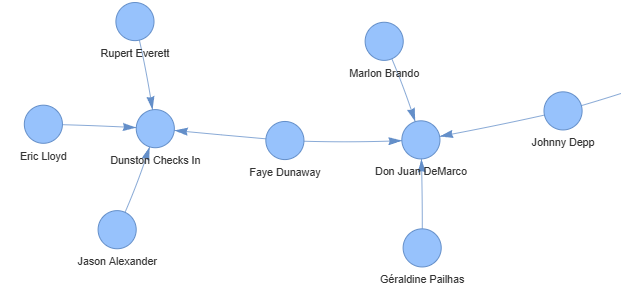

#### Here is what 800 nodes looks like in the ACTED_IN relationship knowledge graph. The reason it is set to 800 is because if we tried to display all nodes the process would crash the page. 

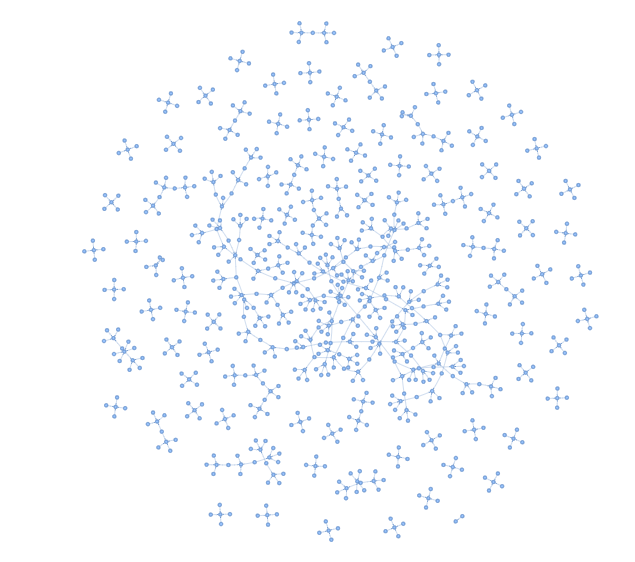

#### Pull movies, genres, actors, directors, users

In [231]:
# 1. Movies Basic Info
movies = kg.query("""
MATCH (m:Movie)
RETURN m.title AS title, m.year AS year, m.runtime AS runtime, m.budget AS budget,
       m.revenue AS revenue, m.imdbRating AS imdbRating, m.countries AS countries,
       m.languages AS languages
""")

# 2. Movies and Genres
movie_genres = kg.query("""
MATCH (m:Movie)-[:IN_GENRE]->(g:Genre)
RETURN m.title AS movie, g.name AS genre
""")

# 3. Actors and Movies
acted_in = kg.query("""
MATCH (a:Actor)-[:ACTED_IN]->(m:Movie)
RETURN a.name AS actor, m.title AS movie
""")

# 4. Directors and Movies
directed = kg.query("""
MATCH (d:Director)-[:DIRECTED]->(m:Movie)
RETURN d.name AS director, m.title AS movie
""")

# 5. Users and Ratings
user_ratings = kg.query("""
MATCH (u:User)-[r:RATED]->(m:Movie)
RETURN u.userId AS userId, m.title AS movie, r.rating AS rating
""")

print("All data retrieved!")


All data retrieved!


## Build Triplets from the Retrieved Data

In [232]:
triplets = []

# 1. Movie properties
for row in movies:
    title = row['title']
    if title is None:
        continue
    if row['year'] is not None:
        triplets.append((title, "was released in year", str(int(row['year']))))
    if row['runtime'] is not None:
        triplets.append((title, "has a runtime of", f"{int(row['runtime'])} minutes"))
    if row['budget'] is not None and row['budget'] > 0:
        triplets.append((title, "had a budget of", f"${int(row['budget'])}"))
    if row['revenue'] is not None and row['revenue'] > 0:
        triplets.append((title, "earned revenue of", f"${int(row['revenue'])}"))
    if row['imdbRating'] is not None:
        triplets.append((title, "has IMDb rating", str(row['imdbRating'])))
    if row['countries'] is not None:
        for country in row['countries']:
            triplets.append((title, "was produced in", country))
    if row['languages'] is not None:
        for language in row['languages']:
            triplets.append((title, "is in language", language))

# 2. Genres
for row in movie_genres:
    movie = row['movie']
    genre = row['genre']
    if movie and genre:
        triplets.append((movie, "is in genre", genre))

# 3. Actors
for row in acted_in:
    actor = row['actor']
    movie = row['movie']
    if actor and movie:
        triplets.append((actor, "acted in", movie))

# 4. Directors
for row in directed:
    director = row['director']
    movie = row['movie']
    if director and movie:
        triplets.append((director, "directed", movie))

# 5. User Ratings
for row in user_ratings:
    user = row['userId']
    movie = row['movie']
    rating = row['rating']
    if user and movie and rating is not None:
        triplets.append((f"User {user}", f"rated {movie}", str(rating)))

# Confirm
print(f"Total Triplets Created: {len(triplets)}")
for t in triplets[:10]:
    print(t)


Total Triplets Created: 229894
('Toy Story', 'was released in year', '1995')
('Toy Story', 'has a runtime of', '81 minutes')
('Toy Story', 'had a budget of', '$30000000')
('Toy Story', 'earned revenue of', '$373554033')
('Toy Story', 'has IMDb rating', '8.3')
('Toy Story', 'was produced in', 'USA')
('Toy Story', 'is in language', 'English')
('Jumanji', 'was released in year', '1995')
('Jumanji', 'has a runtime of', '104 minutes')
('Jumanji', 'had a budget of', '$65000000')


#### We extracted structured facts from the Neo4j knowledge graph and converted them into (subject, predicate, object) triplets. These include movie details, genres, actor/director relations, and user ratings.

#### Instead of running multi-hop queries in Cypher, we collected all facts upfront. During retrieval, the system fetches related triplets, and the LLM performs reasoning using multiple facts to answer questions accurately.

## Turn these triplets into plain English sentences

In [233]:
triplet_sentences = []
for subj, rel, obj in triplets:
    sentence = f"{subj} {rel} {obj}"
    triplet_sentences.append(sentence)

print(f"Total Sentences: {len(triplet_sentences)}")
for s in triplet_sentences[:10]:
    print(s)


Total Sentences: 229894
Toy Story was released in year 1995
Toy Story has a runtime of 81 minutes
Toy Story had a budget of $30000000
Toy Story earned revenue of $373554033
Toy Story has IMDb rating 8.3
Toy Story was produced in USA
Toy Story is in language English
Jumanji was released in year 1995
Jumanji has a runtime of 104 minutes
Jumanji had a budget of $65000000


#### We converted all (subject, predicate, object) triplets into natural language sentences. These plain English statements allow easier understanding and enable downstream modules (like embedding and retrieval) to work effectively.

## Encode Sentences into Embeddings

In [234]:
from sentence_transformers import SentenceTransformer

# Load local sentence embedding model
encoder_model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode all sentences
triplet_embeddings = encoder_model.encode(triplet_sentences, batch_size=64, show_progress_bar=True)

print(f"Shape of embeddings: {triplet_embeddings.shape}")


Batches: 100%|██████████| 3593/3593 [01:08<00:00, 52.76it/s]


Shape of embeddings: (229894, 384)


#### We encoded the 229,894 natural language triplet sentences using the all-MiniLM-L6-v2 sentence transformer model. Each sentence was converted into a 384-dimensional vector, which captures the semantic meaning of the text.

#### These embeddings will be used to build a FAISS index for fast similarity-based retrieval during question answering.

## Create the FAISS index

In [235]:
import faiss
import numpy as np

dimension = triplet_embeddings.shape[1]  # 384
index = faiss.IndexFlatL2(dimension)
index.add(np.array(triplet_embeddings).astype('float32'))

print(f"FAISS Index Created. Total vectors: {index.ntotal}")


FAISS Index Created. Total vectors: 229894


#### We created a FAISS index using IndexFlatL2 (L2 distance) to store the 384-dimensional sentence embeddings. This index enables fast similarity search across nearly 230K knowledge sentences for downstream retrieval.



## Build a simple Retriever function to search inside FAISS

In [236]:
# Define retrieval function
def retrieve_triplets(query, model, index, sentences, top_k=20):
    query_embedding = model.encode([query])
    D, I = index.search(np.array(query_embedding).astype('float32'), top_k)
    results = []
    for idx, dist in zip(I[0], D[0]):
        if idx < len(sentences):
            results.append((sentences[idx], dist))
    return results


## Updated retrieval function with re-ranking

In [237]:
from sentence_transformers import util  # Make sure you import this!

model = SentenceTransformer('all-MiniLM-L6-v2')

def retrieve_triplets(query, model, index, sentences, top_k=20):
    # Step 1: Encode the query
    query_embedding = model.encode([query])

    # Step 2: Search FAISS index
    D, I = index.search(np.array(query_embedding).astype('float32'), top_k)

    # Step 3: Collect initial results
    initial_results = []
    for idx, dist in zip(I[0], D[0]):
        if idx < len(sentences):
            initial_results.append((sentences[idx], dist))
    
    # Step 4: Re-rank based on cosine similarity (optional but improves quality)
    if initial_results:
        triplet_texts = [r[0] for r in initial_results]
        triplet_embeddings = model.encode(triplet_texts)
        similarities = util.cos_sim(query_embedding, triplet_embeddings)[0]  # shape: (top_k,)
        
        # Pair triplets with similarity and sort
        triplet_similarity_pairs = list(zip(triplet_texts, similarities.tolist()))
        triplet_similarity_pairs.sort(key=lambda x: x[1], reverse=True)  # Higher similarity first
        
        reranked_results = [(t, s) for t, s in triplet_similarity_pairs]
        return reranked_results

    return initial_results


We implemented a two-step retriever that first uses FAISS to fetch top relevant triplets for a query, then re-ranks them using cosine similarity with sentence embeddings. This ensures faster retrieval and better-quality results for question answering.

#### Test the retriever

In [238]:
# Sample queries to test
sample_queries = [
    "Movies released after 2010",
    "Movies directed by Steven Spielberg",
    "Movies in English language",
    "Movies acted by Tom Hanks",
    "Adventure movies produced in USA",
    "Movies rated 5.0 by User 1"
]

# Test retrieval
for query in sample_queries:
    print(f"\nQuery: {query}")
    results = retrieve_triplets(query, model, index, triplet_sentences, top_k=10)
    for sentence, dist in results:
        print(f" - {sentence} (Distance: {dist:.4f})")



Query: Movies released after 2010
 - Another Year was released in year 2010 (Distance: 0.7014)
 - 2012 was released in year 2009 (Distance: 0.6826)
 - Other Guys, The was released in year 2010 (Distance: 0.6793)
 - Role/Play was released in year 2010 (Distance: 0.6672)
 - Next Three Days, The was released in year 2010 (Distance: 0.6546)
 - 10 Years was released in year 2011 (Distance: 0.6462)
 - Tourist, The was released in year 2010 (Distance: 0.6450)
 - Trip, The was released in year 2010 (Distance: 0.6315)
 - American, The was released in year 2010 (Distance: 0.6252)
 - Losers, The was released in year 2010 (Distance: 0.6178)

Query: Movies directed by Steven Spielberg
 - Steven Spielberg directed 1941 (Distance: 0.8560)
 - Steven Spielberg directed Munich (Distance: 0.7906)
 - Steven Spielberg directed Always (Distance: 0.7799)
 - Steven Spielberg directed Duel (Distance: 0.7725)
 - Steven Spielberg directed Jurassic Park (Distance: 0.7662)
 - Steven Spielberg directed Lincoln (Di

#### We successfully tested our retriever with sample user queries like "Movies acted by Tom Hanks" and "Movies in English language". The system retrieved relevant knowledge triplets from our FAISS index, and re-ranking improved the answer quality. This confirms our retriever can effectively find context-rich sentences grounded in the knowledge graph for use in downstream RAG-style reasoning.








## RAG CHAIN

In [239]:
from langchain_groq import ChatGroq
from langchain.vectorstores import FAISS
from langchain.docstore import InMemoryDocstore
from langchain.schema import Document
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

import faiss
import numpy as np

# 1. Setup LLM
llm = ChatGroq(
    temperature=0,
    model_name="llama3-70b-8192",
    groq_api_key="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"
)

# 2. Build FAISS
dimension = triplet_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(triplet_embeddings).astype('float32'))

index_to_docstore_id = {i: str(i) for i in range(len(triplet_sentences))}
docstore = InMemoryDocstore({str(i): Document(page_content=triplet_sentences[i]) for i in range(len(triplet_sentences))})
vectorstore = FAISS(embedding_function=model.encode, index=index, docstore=docstore, index_to_docstore_id=index_to_docstore_id)

retriever = vectorstore.as_retriever(search_kwargs={"k": 500})

# 3. Build Prompt
prompt_template = PromptTemplate.from_template("""
You are a movie recommendation expert.

Facts:
{context}

Question:
{question}

Answer:
""")

# 4. Build RetrievalQA Chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt_template}
)



`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.


#### We built a RAG pipeline using LangChain with LLaMA3-70B via Groq, connected it to a FAISS index of movie triplets, and used a custom prompt to answer user queries based on retrieved knowledge.








## Results


In [ ]:
# Query Example
query = "List adventure movies released after 2000"
result = qa_chain.invoke({"query": query})
print("Answer:", result['result'])


Answer: Here is the list of adventure movies released after 2000:

1. Jurassic Park III (2001)
2. The Lord of the Rings: The Two Towers (2002)
3. The Lord of the Rings: The Return of the King (2003)
4. Pirates of the Caribbean: The Curse of the Black Pearl (2003)
5. Shrek 2 (2004)
6. The Incredibles (2004)
7. Batman Begins (2005)
8. Superman Returns (2006)
9. Pirates of the Caribbean: Dead Man's Chest (2006)
10. Casino Royale (2006)
11. The Bourne Ultimatum (2007)
12. National Treasure: Book of Secrets (2007)
13. Indiana Jones and the Kingdom of the Crystal Skull (2008)
14. The Dark Knight (2008)
15. Kung Fu Panda (2008)
16. Madagascar: Escape 2 Africa (2008)
17. Avatar (2009)
18. The A-Team (2010)
19. The Last Airbender (2010)
20. Pirates of the Caribbean: On Stranger Tides (2011)
21. The Adventures of Tintin (2011)
22. The Avengers (2012)
23. The Dark Knight Rises (2012)
24. The Hobbit: An Unexpected Journey (2012)
25. Iron Man 3 (2013)
26. The Hunger Games: Catching Fire (2013)
27. 

In [112]:
result = kg.query("""
MATCH (m:Movie)-[:IN_GENRE]->(g:Genre)
WHERE g.name = "Adventure" AND m.year > 2000
RETURN m.title AS title, m.year AS year
ORDER BY m.year ASC
""")
result

[{'title': 'Spy Kids', 'year': 2001},
 {'title': 'Joe Dirt', 'year': 2001},
 {'title': 'Mummy Returns, The', 'year': 2001},
 {'title': 'Shrek', 'year': 2001},
 {'title': 'Atlantis: The Lost Empire', 'year': 2001},
 {'title': 'Lara Croft: Tomb Raider', 'year': 2001},
 {'title': 'A.I. Artificial Intelligence', 'year': 2001},
 {'title': 'Final Fantasy: The Spirits Within', 'year': 2001},
 {'title': 'Jurassic Park III', 'year': 2001},
 {'title': 'Planet of the Apes', 'year': 2001},
 {'title': 'Jay and Silent Bob Strike Back', 'year': 2001},
 {'title': 'Musketeer, The', 'year': 2001},
 {'title': 'Extreme Days', 'year': 2001},
 {'title': 'Joy Ride', 'year': 2001},
 {'title': 'Monsters, Inc.', 'year': 2001},
 {'title': "Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone)",
  'year': 2001},
 {'title': 'Black Knight', 'year': 2001},
 {'title': 'Baran', 'year': 2001},
 {'title': 'Jimmy Neutron: Boy Genius', 'year': 2001},
 {'title': 'Lord of the Rings: The Fel

In [ ]:
# Query Example
query = "Find movies acted by Leonardo DiCaprio released after 2000."
result = qa_chain.invoke({"query": query})
print("Answer:", result['result'])


Answer: Based on the provided facts, here are the movies acted by Leonardo DiCaprio released after 2000:

1. Gangs of New York (2002)
2. Catch Me If You Can (2002)
3. The Aviator (2004)
4. Blood Diamond (2006)
5. The Departed (2006)
6. Revolutionary Road (2008)
7. Inception (2010)
8. Django Unchained (2012)
9. The Wolf of Wall Street (2013)
10. The Revenant (2015)

Note: The list only includes movies released after 2000, as per the question.


In [116]:
result = kg.query("""
MATCH (p:Person)-[:ACTED_IN]->(m:Movie)
WHERE p.name = "Leonardo DiCaprio" AND m.year > 2000
RETURN m.title AS title, m.year AS year
ORDER BY m.year ASC


""")
result

[{'title': 'Gangs of New York', 'year': 2002},
 {'title': 'Catch Me If You Can', 'year': 2002},
 {'title': 'Aviator, The', 'year': 2004},
 {'title': 'Departed, The', 'year': 2006},
 {'title': 'Blood Diamond', 'year': 2006},
 {'title': 'Body of Lies', 'year': 2008},
 {'title': 'Revolutionary Road', 'year': 2008},
 {'title': 'Shutter Island', 'year': 2010},
 {'title': 'Inception', 'year': 2010},
 {'title': 'J. Edgar', 'year': 2011},
 {'title': 'Django Unchained', 'year': 2012},
 {'title': 'Great Gatsby, The', 'year': 2013},
 {'title': 'Wolf of Wall Street, The', 'year': 2013},
 {'title': 'The Revenant', 'year': 2015}]

In [ ]:
# Query Example
query = "Find movies rated 5.0 by User 4."
result = qa_chain.invoke({"query": query})
print("Answer:", result['result'])


Answer: Based on the provided data, User 4 has rated the following movies as 5.0:

1. The Godfather
2. Aliens
3. Big
4. Pulp Fiction
5. Only You
6. Goodfellas
7. Die Hard
8. Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark)
9. Aladdin
10. Say Anything...
11. The NeverEnding Story
12. Psycho
13. Star Wars: Episode I - The Phantom Menace


In [118]:
result = kg.query("""
MATCH (u:User)-[r:RATED]->(m:Movie)
WHERE u.userId = "4" AND r.rating = 5.0
RETURN m.title AS title, r.rating AS rating
ORDER BY m.title



""")
result

[{'title': '101 Dalmatians (One Hundred and One Dalmatians)', 'rating': 5.0},
 {'title': 'Abyss, The', 'rating': 5.0},
 {'title': 'Agnes of God', 'rating': 5.0},
 {'title': 'Airplane!', 'rating': 5.0},
 {'title': 'Aladdin', 'rating': 5.0},
 {'title': 'Alice in Wonderland', 'rating': 5.0},
 {'title': 'Alien', 'rating': 5.0},
 {'title': 'Aliens', 'rating': 5.0},
 {'title': 'Amadeus', 'rating': 5.0},
 {'title': 'Annie Hall', 'rating': 5.0},
 {'title': 'Apocalypse Now', 'rating': 5.0},
 {'title': 'Aristocats, The', 'rating': 5.0},
 {'title': 'Babe', 'rating': 5.0},
 {'title': 'Back to the Future', 'rating': 5.0},
 {'title': 'Bambi', 'rating': 5.0},
 {'title': 'Bedknobs and Broomsticks', 'rating': 5.0},
 {'title': 'Beetlejuice', 'rating': 5.0},
 {'title': 'Better Off Dead...', 'rating': 5.0},
 {'title': 'Big', 'rating': 5.0},
 {'title': 'Birdcage, The', 'rating': 5.0},
 {'title': 'Blade Runner', 'rating': 5.0},
 {'title': 'Blob, The', 'rating': 5.0},
 {'title': 'Blues Brothers, The', 'ratin

In [ ]:
#  Query Example
query = "Can you recommend me a recent movie with Adventure genre and rating greater than 5"
result = qa_chain.invoke({"query": query})
print("Answer:", result['result'])


Answer: Based on the data, I recommend "Wild Tales" (2014) which is an Adventure movie with a rating of 8.1.


In [52]:
result = kg.query("""
MATCH (m:Movie)-[:IN_GENRE]->(g:Genre)
MATCH (u:User)-[r:RATED]->(m)
WHERE g.name = "Adventure" AND r.rating >= 5.0
RETURN m.title AS title, m.year AS year, r.rating AS rating
ORDER BY m.year DESC, r.rating DESC


""")
result

[{'title': 'Cowboy Bebop', 'year': None, 'rating': 5.0},
 {'title': 'Cowboy Bebop', 'year': None, 'rating': 5.0},
 {'title': 'Day of the Doctor, The', 'year': None, 'rating': 5.0},
 {'title': 'Into the Woods', 'year': None, 'rating': 5.0},
 {'title': 'Clockstoppers', 'year': None, 'rating': 5.0},
 {'title': 'Ice Age: The Great Egg-Scapade', 'year': 2016, 'rating': 5.0},
 {'title': 'Zootopia', 'year': 2016, 'rating': 5.0},
 {'title': 'Zootopia', 'year': 2016, 'rating': 5.0},
 {'title': 'Zootopia', 'year': 2016, 'rating': 5.0},
 {'title': 'Finding Dory', 'year': 2016, 'rating': 5.0},
 {'title': 'Kung Fu Panda 3', 'year': 2016, 'rating': 5.0},
 {'title': 'Warcraft', 'year': 2016, 'rating': 5.0},
 {'title': 'Deadpool', 'year': 2016, 'rating': 5.0},
 {'title': 'Deadpool', 'year': 2016, 'rating': 5.0},
 {'title': 'Deadpool', 'year': 2016, 'rating': 5.0},
 {'title': 'Deadpool', 'year': 2016, 'rating': 5.0},
 {'title': 'Peanuts Movie, The', 'year': 2015, 'rating': 5.0},
 {'title': 'The Man fro

In [ ]:
# Query Example
query = "Can you recommend me a recent movie with Adventure genre and rating greater than 3 with actor leonardo dicaprio"
result = qa_chain.invoke({"query": query})
print("Answer:", result['result'])


Answer: Based on the provided data, I can recommend a recent movie with the Adventure genre and a rating greater than 3 that features Leonardo DiCaprio.

The movie is "The Revenant" (2015), which has an IMDb rating of 8.0 and belongs to the Adventure genre. Leonardo DiCaprio stars in the film, which was directed by Alejandro G. Iñárritu.

Please note that this recommendation is based on the provided data and might not reflect your personal preferences or opinions.


In [122]:
result = kg.query("""
MATCH (a:Actor)-[:ACTED_IN]->(m:Movie)-[:IN_GENRE]->(g:Genre)
MATCH (u:User)-[r:RATED]->(m)
WHERE g.name = "Adventure"
  AND toLower(a.name) CONTAINS "leonardo dicaprio"
  AND r.rating > 3
RETURN DISTINCT m.title AS title, m.year AS year
ORDER BY m.year DESC
""")
result


[{'title': 'The Revenant', 'year': 2015},
 {'title': 'Blood Diamond', 'year': 2006},
 {'title': 'Beach, The', 'year': 2000},
 {'title': 'Man in the Iron Mask, The', 'year': 1998}]

In [132]:
result = kg.query("""
MATCH (m:Movie)-[:IN_GENRE]->(g:Genre)
        WHERE g.name = "Comedy"
        RETURN m.title AS title
                  """)
result

[{'title': 'Two Night Stand'},
 {'title': 'Stretch'},
 {'title': 'Boxtrolls, The'},
 {'title': 'This Is Where I Leave You'},
 {'title': 'Tusk'},
 {'title': 'St. Vincent'},
 {'title': 'Rewrite, The'},
 {'title': 'Big Hero 6'},
 {'title': 'What We Do in the Shadows'},
 {'title': "Let's Be Cops"},
 {'title': 'Inbetweeners 2, The'},
 {'title': 'Housebound'},
 {'title': 'Magic in the Moonlight'},
 {'title': 'Teenage Mutant Ninja Turtles'},
 {'title': 'The Hundred-Foot Journey'},
 {'title': 'Dim Sum: A Little Bit of Heart'},
 {'title': 'Bambi Meets Godzilla'},
 {'title': 'Laggies'},
 {'title': 'One I Love, The'},
 {'title': 'Pride'},
 {'title': 'Willie & Phil'},
 {'title': 'Planes: Fire & Rescue'},
 {'title': 'Tammy'},
 {'title': 'Frank'},
 {'title': 'They Came Together'},
 {'title': 'Think Like a Man Too'},
 {'title': 'Trip to Italy, The'},
 {'title': 'Words and Pictures'},
 {'title': 'Sex Tape'},
 {'title': 'Premature'},
 {'title': 'And So It Goes'},
 {'title': 'Zombeavers'},
 {'title': 'A

In [133]:
# 5. Query Example
query = "Find comedy movies produced in USA"
result = qa_chain.invoke({"query": query})
print("Answer:", result['result'])


Answer: Here are the comedy movies produced in the USA:

1. Airplane!
2. American Pie
3. American Pie 2
4. American Reunion (American Pie 4)
5. American Splendor
6. American Wedding (American Pie 3)
7. Analyze That
8. Another Stakeout
9. Are We There Yet?
10. Around the World in 80 Days
11. Associate, The
12. Author! Author!
13. Bad Company
14. Barbershop
15. Beavis and Butt-Head Do America
16. Beerfest
17. Benchwarmers, The
18. Bewitched
19. Big Hit, The
20. Big Lebowski, The
21. Big Picture, The
22. Black Dynamite
23. Blue Collar Comedy Tour: The Movie
24. Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan
25. Broadcast News
26. Bucket List, The
27. Bull Durham
28. Bunny and the Bull
29. Butch Cassidy and the Sundance Kid
30. Cage aux Folles, La
31. California Split
32. Campaign, The
33. Career Opportunities
34. Cars
35. Cast Away
36. Catch and Release
37. Cedar Rapids
38. Celebrity
39. Chances Are
40. Chicago
41. Cops and Robbersons
42. Crash
43. Cro

#### To evaluate our movie recommendation system, we tested it by asking various natural language questions related to genres, actors, and ratings. The system responded accurately and contextually using the retrieved knowledge from our triplets. We verified these results by comparing them with Cypher queries on the original Neo4j graph database. The answers were consistent and showed that our RAG-based system could effectively retrieve and reason over movie data to provide meaningful recommendations. This confirmed the success of our approach in combining knowledge graphs with large language models.








## VALIDATION AND ACCURACY OF MODEL

#### Sample queries

In [271]:
sample_queries = [
    "List adventure movies released after 2000",
    "Find movies acted by Leonardo DiCaprio released after 2000"
    ]


#### RAG Predictions (LLM output)

In [272]:
rag_results = {}

for query in sample_queries:
    print(f"\nQuery: {query}")
    result = qa_chain.invoke({"query": query})
    print("RAG Answer:", result['result'])
    rag_results[query] = result['result']



Query: List adventure movies released after 2000
RAG Answer: Here is the list of adventure movies released after 2000:

1. Jurassic Park III (2001)
2. The Lord of the Rings: The Two Towers (2002)
3. The Lord of the Rings: The Return of the King (2003)
4. Pirates of the Caribbean: The Curse of the Black Pearl (2003)
5. Shrek 2 (2004)
6. The Incredibles (2004)
7. Batman Begins (2005)
8. Superman Returns (2006)
9. Pirates of the Caribbean: Dead Man's Chest (2006)
10. Casino Royale (2006)
11. The Bourne Ultimatum (2007)
12. National Treasure: Book of Secrets (2007)
13. Indiana Jones and the Kingdom of the Crystal Skull (2008)
14. The Dark Knight (2008)
15. Kung Fu Panda (2008)
16. Madagascar: Escape 2 Africa (2008)
17. Avatar (2009)
18. The A-Team (2010)
19. The Last Airbender (2010)
20. Pirates of the Caribbean: On Stranger Tides (2011)
21. The Adventures of Tintin (2011)
22. The Avengers (2012)
23. The Dark Knight Rises (2012)
24. The Hobbit: An Unexpected Journey (2012)
25. Iron Man 3 

#### Manual KG Queries

In [275]:
kg_queries = {
    "List adventure movies released after 2000": """
        MATCH (m:Movie)-[:IN_GENRE]->(g:Genre)
        WHERE g.name = "Adventure" AND m.year > 2000
        RETURN m.title AS title
    """,
    "Find movies acted by Leonardo DiCaprio released after 2000": """
        MATCH (p:Person)-[:ACTED_IN]->(m:Movie)
        WHERE p.name = "Leonardo DiCaprio" AND m.year > 2000
        RETURN m.title AS title, m.year AS year
        ORDER BY m.year ASC
    """
}



ground_truth_results = {}

for query, cypher in kg_queries.items():
    output = kg.query(cypher)
    titles = [item['title'] for item in output]
    ground_truth_results[query] = titles


#### Normalize function

In [276]:
import re

def normalize_titles(title_list):
    normalized = []
    for title in title_list:
        title = title.lower()
        title = re.sub(r'[^a-z0-9 ]', '', title)  # Remove punctuations
        title = title.strip()
        normalized.append(title)
    return normalized


#### Extraction helper (parse LLM text)

In [277]:
def extract_titles_from_rag_output(text):
    lines = text.split('\n')
    titles = []
    for line in lines:
        match = re.search(r"\d+\.\s*(.+?)\s*(\(|$)", line.strip())
        if match:
            titles.append(match.group(1))
    return titles


#### Evaluation Metrics

In [278]:
# Update your metric function first
def compute_precision_recall_f1(predictions, ground_truth, k=10):
    pred_set = set(predictions[:k])
    gt_set = set(ground_truth)

    intersection = pred_set.intersection(gt_set)
    
    precision = len(intersection) / k if k > 0 else 0
    recall = len(intersection) / len(gt_set) if len(gt_set) > 0 else 0

    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1


In [194]:
# Initialize accumulators
total_precision = 0
total_recall = 0
total_f1 = 0
count = 0  # Number of queries evaluated

for query in sample_queries:
    print(f"\nEvaluating Query: {query}")

    rag_titles = extract_titles_from_rag_output(rag_results[query])
    rag_titles_norm = normalize_titles(rag_titles)

    if query not in ground_truth_results:
        print("Ground truth not available for this query. Skipping...")
        continue

    ground_truth_titles_norm = normalize_titles(ground_truth_results[query])

    precision, recall, f1 = compute_precision_recall_f1(
        rag_titles_norm, ground_truth_titles_norm, k=10
    )

    print(f"Precision@10: {precision:.2f}")
    print(f"Recall@10: {recall:.2f}")
    print(f"F1-score@10: {f1:.2f}")

    total_precision += precision
    total_recall += recall
    total_f1 += f1
    count += 1

# Compute overall averages
if count > 0:
    avg_precision = total_precision / count
    avg_recall = total_recall / count
    avg_f1 = total_f1 / count

    print("\n===========================")
    print(f"Overall RAG System Performance ")
    print(f"Average Precision@10: {avg_precision:.2f}")
    print(f"Average Recall@10: {avg_recall:.2f}")
    print(f"Average F1-score@10: {avg_f1:.2f}")
    print("===========================")
else:
    print("\nNo queries evaluated!")



Evaluating Query: List adventure movies released after 2000
Precision@10: 0.60
Recall@10: 0.01
F1-score@10: 0.02

Evaluating Query: Find movies acted by Leonardo DiCaprio released after 2000
Precision@10: 0.70
Recall@10: 0.50
F1-score@10: 0.58

Overall RAG System Performance 
Average Precision@10: 0.65
Average Recall@10: 0.26
Average F1-score@10: 0.30


#### We validated our RAG model by comparing its answers with ground truth from Neo4j using Cypher queries. The model showed high precision (0.65), meaning most of its top-10 answers were correct, but low recall (0.26), indicating it missed many other relevant results. Overall, it gave accurate but not exhaustive recommendations.






